# Data Understanding

### Import Libraries

In [398]:
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import datetime

In [399]:
pd.set_option("display.max_rows", 500)

In [400]:
dataPath_Raw = ("../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
dataPath_Processed = ("../data/processed/")

pd_raw = pd.read_csv(dataPath_Raw)

In [401]:
pd_raw.head();

### Extract the columns

In [402]:
pd_raw.columns[:];   

In [403]:
time_idX = pd_raw.columns[4:]

In [404]:
df_plot = pd.DataFrame({
    
    'date':time_idX})

df_plot.head();


In [405]:
len(pd_raw['Country/Region'].unique())
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

### Define a DF with Country as a Column Name

In [406]:
pd_raw[pd_raw['Country/Region']=="Afghanistan"];

In [407]:
pd_raw[pd_raw['Country/Region']=="India"].iloc[:,4::].sum(axis=0);

In [408]:
country_list = [
    'Italy',
    'US',
    'Spain',
    'Germany',
    'India',
    'Korea, South',
    'China',
    'Brazil'
]

In [409]:
for i in country_list:
    df_plot[i] = np.array(pd_raw[pd_raw['Country/Region'] == i].iloc[:,4::].sum(axis=0))

In [410]:
df_plot;

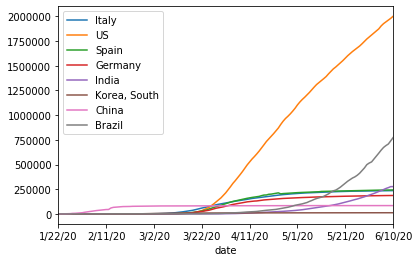

In [411]:
df_plot.set_index('date').plot()

### Data Type Date

In [412]:
df_plot.head()

,date,Italy,US,Spain,Germany,India,"Korea, South",China,Brazil
0,1/22/20,0,1,0,0,0,1,548,0
1,1/23/20,0,1,0,0,0,1,643,0
2,1/24/20,0,2,0,0,0,2,920,0
3,1/25/20,0,2,0,0,0,2,1406,0
4,1/26/20,0,5,0,0,0,3,2075,0


In [413]:
df_plot.date[0]

'1/22/20'

In [414]:
datetime.strptime(df_plot.date[0], "%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [415]:
#Convert the String to DateTime object

time_idX = [datetime.strptime(i, "%m/%d/%y") for i in df_plot.date] 

# Converting back to ISO (str)

time_str = [i.strftime("%y-%m-%d") for i in time_idX]

#time_idX

In [416]:

#time_idX[0:5]
#type(time_idX)

In [417]:
df_plot['date']=time_idX
type(df_plot["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [418]:
df_plot.head()

,date,Italy,US,Spain,Germany,India,"Korea, South",China,Brazil
0,2020-01-22,0,1,0,0,0,1,548,0
1,2020-01-23,0,1,0,0,0,1,643,0
2,2020-01-24,0,2,0,0,0,2,920,0
3,2020-01-25,0,2,0,0,0,2,1406,0
4,2020-01-26,0,5,0,0,0,3,2075,0


In [419]:
df_plot.to_csv(dataPath_Processed + "COVID_Flat_Table.csv", sep=",")

## Relational Data Model

### Defining a primary Key

In [420]:
pd_raw = pd.read_csv(dataPath_Raw)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,765,844,851,852,852,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,86,86,86,86,88,91,92,96,113


In [426]:
pd_dataBase = pd_raw.rename(columns={'Country/Region':'country', 
                                     'Province/State':'state'})

In [427]:
pd_dataBase = pd_dataBase.drop(['Lat', 'Long'], axis=1)

In [428]:
pd_dataBase.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142
1,NaN,Albania,0,0,0,0,0,0,0,0,...,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,765,844,851,852,852,852,852,852,852,852
4,NaN,Angola,0,0,0,0,0,0,0,0,...,86,86,86,86,86,88,91,92,96,113


In [429]:
pd_dataBase.set_index(['state', 'country'])

1/22/20  \
state                            country                                     
NaN                              Afghanistan                             0   
                                 Albania                                 0   
                                 Algeria                                 0   
                                 Andorra                                 0   
                                 Angola                                  0   
                                 Antigua and Barbuda                     0   
                                 Argentina                               0   
                                 Armenia                                 0   
Australian Capital Territory     Australia                               0   
New South Wales                  Australia                               0   
Northern Territory               Australia                               0   
Queensland                       Australia                               0   
South Australia                  Australia                               0   
Tasmania                         Australia                               0   
Victoria                         Australia                               0   
Western Australia                Australia                               0   
NaN                              Austria                                 0   
                                 Azerbaijan                              0   
                                 Bahamas                                 0   
                                 Bahrain                                 0   
                                 Bangladesh                              0   
                                 Barbados                                0   
                                 Belarus                                 0   
                                 Belgium                                 0   
                                 Benin                                   0   
                                 Bhutan                                  0   
                                 Bolivia                                 0   
                                 Bosnia and Herzegovina                  0   
                                 Brazil                                  0   
                                 Brunei                                  0   
                                 Bulgaria                                0   
                                 Burkina Faso                            0   
                                 Cabo Verde                              0   
                                 Cambodia                                0   
                                 Cameroon                                0   
Alberta                          Canada                                  0   
British Columbia                 Canada                                  0   
Grand Princess                   Canada                                  0   
Manitoba                         Canada                                  0   
New Brunswick                    Canada                                  0   
Newfoundland and Labrador        Canada                                  0   
Nova Scotia                      Canada                                  0   
Ontario                          Canada                                  0   
Prince Edward Island             Canada                                  0   
Quebec                           Canada                                  0   
Saskatchewan                     Canada                                  0   
NaN                              Central African Republic                0   
                                 Chad                                    0   
                                 Chile                                   0   
Anhui                            China                                   1   
Beijing    